# Which hotel is better for the concept of 'nightlife'?


Behrouz Raftari

This investigation seeks to analyze and rank a number of hotels from the nightlife perspective based on the data set provided by --.

# Part 1: Exploratory analysis of the data

### 1. Loading and inspecting the data

The dataset is available in the csv format, so as the first step and to take advantage of Pandas library, the data is converted into a DataFrame style.

In [1]:
# Import pandas library
import pandas as pd

# Load the first dataset
df_hotels = pd.read_csv('/home/behrouz/Documents/trivago/data_csvs/hotels.csv')

# Load the second dataset
df_pois = pd.read_csv('/home/behrouz/Documents/trivago/data_csvs/pois.csv')

In [2]:
# Inspect the first dataset, the first rows
df_hotels.head()

,hotel_id,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,...,eco_friendly_hotel,party_people,business_people,honeymooners,singles,large_groups,family_hotel,gay_friendly,wifi_lobby,wifi_room
0,11511119,31497,Hotel,Xi Hu,2799,114.171005,22.306065,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
1,11577919,14121,Hotel,Colors Urban Thessaloniki,586,22.939219,40.634808,5.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2,11530983,27561,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,6485,4.876711,52.427399,5.0,1,2,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0
3,11814291,14121,Hotel,Elia City,611,22.938929,40.634880,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
4,11938295,31497,Home / Apartment,Le Petit Rosedale Hong Kong,2870,114.189240,22.279209,3.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0


In [3]:
# Inspect the first dataset, the last rows
df_hotels.tail()

,hotel_id,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,...,eco_friendly_hotel,party_people,business_people,honeymooners,singles,large_groups,family_hotel,gay_friendly,wifi_lobby,wifi_room
395,18397931,14121,Home / Apartment,Mazi7thfloor #3,683,22.940252,40.638573,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,8038679,14121,Hostel,Thess Hostel,2162,22.927021,40.647308,5.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,8354403,14257,Motel,Central Inn Motel,10481,-118.256729,33.957256,1.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
398,18828775,14121,Home / Apartment,Penthouse With City View!,0,22.946138,40.634357,NaN,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,13119007,31497,Hotel,iclub Ma Tau Wai,4677,114.188751,22.316177,4.0,1,2,...,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0


In [4]:
# Inspect the pois dataset, the first rows
df_pois.head()

,city_id,poi_id,name,longitude,latitude,city,country,poi_types
0,14121,203796,White Tower of Thessaloniki,22.948381,40.626396,Thessaloniki,Greece,"Architectural Buildings, Historic Sites, Touri..."
1,14121,313891,Hagia Sophia,22.946700,40.632800,Thessaloniki,Greece,"Religious Sites, Tourist Attractions"
2,14121,362166,Saint Dimitirios,22.946100,40.634400,Thessaloniki,Greece,"Religious Sites, Tourist Attractions"
3,14121,457336,Museum of Byzantine Culture,22.954820,40.624138,Thessaloniki,Greece,"Museums, Tourist Attractions"
4,14121,457381,Ataturk Museum,22.954300,40.635777,Thessaloniki,Greece,"Architectural Buildings, Historic Sites, Museu..."


In [5]:
# Inspect the pois dataset, the last rows
df_pois.tail()

,city_id,poi_id,name,longitude,latitude,city,country,poi_types
10621,31497,10271621,Hui Lau Shan,114.170672,22.315851,Hong Kong,China,"Food & Drink, Café"
10622,31497,10271915,Godiva,114.163002,22.302942,Hong Kong,China,"Outfit Shops, Shopping"
10623,31497,10272124,EAT.it,114.185757,22.282530,Hong Kong,China,"Restaurants, Food & Drink"
10624,31497,10335678,SEK KONG,114.080000,22.436000,Hong Kong,Hong Kong,"Transportation, Airports"
10625,31497,10370265,MTR Wan Chai Station,114.173108,22.278989,Hong Kong,China,"Transportation, Services, Metro Stations, Shop..."


In [6]:
# hotels DataFrame information
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 31 columns):
hotel_id              400 non-null int64
city_id               400 non-null int64
hotel_type            400 non-null object
basename              400 non-null object
distance_to_center    400 non-null int64
longitude             400 non-null float64
latitude              400 non-null float64
overall_rating        359 non-null float64
impression_level      400 non-null int64
interaction_level     400 non-null int64
car_park              292 non-null float64
club_club_hotel       9 non-null float64
designer_hotel        54 non-null float64
attraction_hotel      20 non-null float64
luxury_hotel          53 non-null float64
beach_front_hotel     27 non-null float64
convention_hotel      95 non-null float64
spa_hotel             37 non-null float64
country_hotel         10 non-null float64
airport_hotel         45 non-null float64
senior_hotel          3 non-null float64
eco_friendly_hot

In [7]:
# pois DataFrame information
df_pois.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10626 entries, 0 to 10625
Data columns (total 8 columns):
city_id      10626 non-null int64
poi_id       10626 non-null int64
name         10626 non-null object
longitude    10626 non-null float64
latitude     10626 non-null float64
city         10626 non-null object
country      10626 non-null object
poi_types    10626 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 664.2+ KB


As can be seen from the above information, the date is a mixture of diffrent types including: float, int and object. The information also shows no null data in pois data while null are seen in most of the features of hotels data. 

In [8]:
# Summary statistics for hotels data
df_hotels.describe()

,hotel_id,city_id,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,car_park,club_club_hotel,...,eco_friendly_hotel,party_people,business_people,honeymooners,singles,large_groups,family_hotel,gay_friendly,wifi_lobby,wifi_room
count,4.000000e+02,400.000000,4.000000e+02,400.000000,400.000000,359.000000,400.000000,400.000000,292.000000,9.0,...,39.000000,73.000000,228.000000,86.000000,105.000000,139.000000,157.000000,82.000000,342.000000,342.000000
mean,4.244724e+06,21859.000000,1.321433e+04,5.996754,37.322597,3.206128,1.930000,1.692500,0.890411,0.0,...,0.769231,0.808219,0.995614,0.988372,0.990476,0.978417,0.904459,0.939024,0.988304,0.988304
std,5.293982e+06,7805.128062,1.526345e+05,82.822482,10.893116,1.308275,1.764336,1.361093,0.312913,0.0,...,0.426833,0.396426,0.066227,0.107833,0.097590,0.145842,0.294902,0.240758,0.107671,0.107671
min,1.585300e+04,14121.000000,0.000000e+00,-118.468529,22.199528,1.000000,1.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.083580e+05,14223.000000,9.305000e+02,-18.350004,30.073911,2.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.934913e+06,20909.000000,2.337000e+03,13.834069,36.210762,3.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7.009567e+06,28545.000000,6.200750e+03,46.274646,43.562843,4.000000,2.000000,2.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.963608e+07,31497.000000,3.043545e+06,114.262268,52.427399,5.000000,10.000000,10.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Summary statistics for pois data
df_pois.describe()

,city_id,poi_id,longitude,latitude
count,10626.000000,1.062600e+04,10626.000000,10626.000000
mean,19295.409938,8.473293e+06,-60.945907,39.196023
std,6763.765448,3.121910e+06,73.452877,9.225889
min,14121.000000,1.394700e+04,-118.475638,22.200000
25%,14257.000000,1.000423e+07,-118.322839,34.048960
50%,14257.000000,1.012486e+07,-118.244742,34.083740
75%,27561.000000,1.023565e+07,4.891139,52.354851
max,31497.000000,1.037078e+07,114.273382,52.421800


### 2. Handeling the missing values

In [10]:
# Counting missing values in hotels dataset
df_hotels.isnull().sum()

hotel_id                0
city_id                 0
hotel_type              0
basename                0
distance_to_center      0
longitude               0
latitude                0
overall_rating         41
impression_level        0
interaction_level       0
car_park              108
club_club_hotel       391
designer_hotel        346
attraction_hotel      380
luxury_hotel          347
beach_front_hotel     373
convention_hotel      305
spa_hotel             363
country_hotel         390
airport_hotel         355
senior_hotel          397
eco_friendly_hotel    361
party_people          327
business_people       172
honeymooners          314
singles               295
large_groups          261
family_hotel          243
gay_friendly          318
wifi_lobby             58
wifi_room              58
dtype: int64

In [11]:
# Counting missing values in pois dataset
df_pois.isnull().sum()

city_id      0
poi_id       0
name         0
longitude    0
latitude     0
city         0
country      0
poi_types    0
dtype: int64

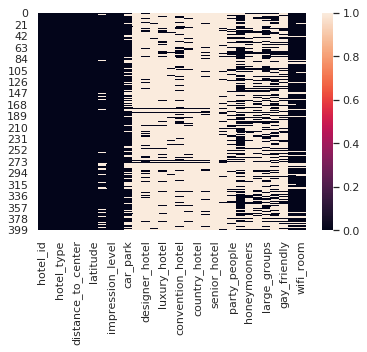

In [12]:
# Jupyter inline plotting
%matplotlib inline

# import plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.heatmap(df_hotels.isnull())

plt.show()


The bright area in the figure above shows that there is a significant amount of missing data in the dataset.

Here, the features with missing values can be seen as categorical features. One approach to imputing categorical features is to replace missing values with the most common class. Let's do thee same here. You can do with by taking the index of the most common feature given in Pandas 'value_counts' function.

In [13]:
# Replacing the missing values with the most frequent value per column
df_hotels = df_hotels.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Inspect the updated dataframe
df_hotels.isnull().sum()

hotel_id              0
city_id               0
hotel_type            0
basename              0
distance_to_center    0
longitude             0
latitude              0
overall_rating        0
impression_level      0
interaction_level     0
car_park              0
club_club_hotel       0
designer_hotel        0
attraction_hotel      0
luxury_hotel          0
beach_front_hotel     0
convention_hotel      0
spa_hotel             0
country_hotel         0
airport_hotel         0
senior_hotel          0
eco_friendly_hotel    0
party_people          0
business_people       0
honeymooners          0
singles               0
large_groups          0
family_hotel          0
gay_friendly          0
wifi_lobby            0
wifi_room             0
dtype: int64

### 3. Identifying & removing the duplicacy

In [14]:
#  Dropping the duplicates from the hotels data
print(df_hotels.shape)
df_hotels = df_hotels.drop_duplicates(keep='first')
print(df_hotels.shape)

(400, 31)
(400, 31)


In [15]:
#  Dropping the duplicates from the pois data
print(df_pois.shape)
df_pois = df_pois.drop_duplicates(keep='first')
print(df_pois.shape)

(10626, 8)
(10626, 8)


Remaining the same shape after processing shows that there are no duplicates in the rows of these two data sets.

### 4. Featutre analysis 

Let's start with one important feature, 'distance_to_center, that should certainly be considered for the nightlife concept.

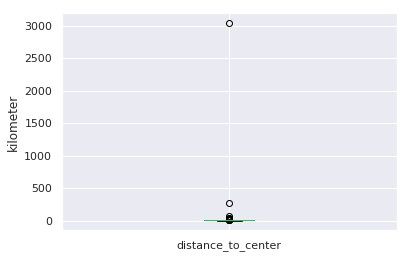

In [16]:
# Visualization with box plot for distance_to_center feature

# Convert meters to kilometers
distance = df_hotels['distance_to_center'] / 1000 

ax = distance.plot(kind='box')
ax.set_ylabel("kilometer")
plt.show()

In one of the data we observe a distance of more than 3,000 km from the center, which is suspected to be a noise in the dataset.Let's see which hotel this is for.

In [17]:
df_hotels[df_hotels.distance_to_center > 3000000]

,hotel_id,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,...,eco_friendly_hotel,party_people,business_people,honeymooners,singles,large_groups,family_hotel,gay_friendly,wifi_lobby,wifi_room
394,15451699,14257,Home / Apartment,Home2 Suites By Hilton Opelika Auburn,3043545,-85.400017,32.612411,4.0,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


To identify the country and city names, we need to extract the relevant information in the pois (point of intrests) dataset.

In [18]:
df_pois[(df_pois.city_id == 14257)][:1]

,city_id,poi_id,name,longitude,latitude,city,country,poi_types
477,14257,13947,Michael Jackson at Walk Of Fame,-118.340234,34.101622,Los Angeles,USA,"Boardwalk / Promenade / Street, Historic Sites..."


The above information shows the city ID for Los Angeles in the United States. In fact, it's hard to think of a hotel with such a distance to the city in the United States. Therefore, this data is a noise and not an outlier. One remedy is to eliminate the row with an unusual distance from the center.

In [19]:
# Removing row with noise from the dataset
df_hotels.drop(df_hotels[df_hotels.distance_to_center > 3000000].index, inplace=True)
df_hotels.shape

(399, 31)

Let's plot the distance_to_center feature agian.

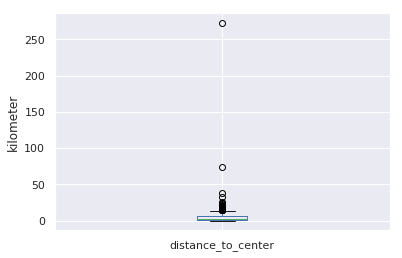

In [20]:
# Convert meters to kilometers
distance = df_hotels['distance_to_center'] / 1000 

ax = distance.plot(kind='box')
ax.set_ylabel("kilometer")
plt.show()

It is worth considering which hotel is located more than 250 kilometers to the center of the city.

In [21]:
df_hotels[df_hotels.distance_to_center > 250000]

,hotel_id,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,...,eco_friendly_hotel,party_people,business_people,honeymooners,singles,large_groups,family_hotel,gay_friendly,wifi_lobby,wifi_room
375,19636083,14121,Hotel,Relax In Crazy Farm,272990,23.74828,38.25869,4.0,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [22]:
df_pois[(df_pois.city_id == 14121)][:1]

,city_id,poi_id,name,longitude,latitude,city,country,poi_types
0,14121,203796,White Tower of Thessaloniki,22.948381,40.626396,Thessaloniki,Greece,"Architectural Buildings, Historic Sites, Touri..."


Lets trust the data and continue. 

Maybe a swarmplot is a good way to see distance distribution.

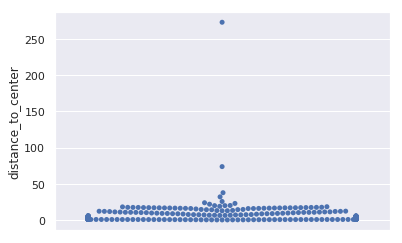

In [23]:
sns.swarmplot(y = distance)

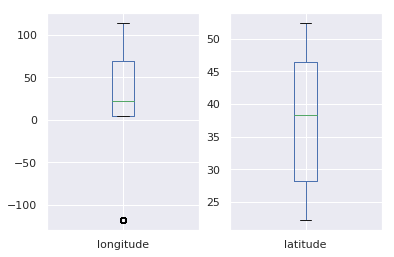

In [24]:
# Visualization with box plot for longitude and latitude features
plt.subplot(1, 2, 1)
df_hotels['longitude'].plot(kind='box')
plt.subplot(1, 2, 2)
df_hotels['latitude'].plot(kind='box')

Lines of latitude are horizontal lines that stretch from east to west across the globe. The longest and main line of latitude is called the Equator. The Equator is represented as 0° latitude. The value range for latitude is from -90 to 90. Here the result shows positve values and so to the north part of the globe. 

Lines of longitude are vertical lines that stretch from the North Pole to the South Pole. The main line of longitude is called the Prime Meridian. The Prime Meridian is represented as 0° longitude. The value range for longitude is form -180 to 180. Here we see both negative and positive values almost in the same range. Therefore the accommodations are located on the west and east sides of Prime Meridian.

A swarmplot is definitely a proper way to identify the distribution of the values.

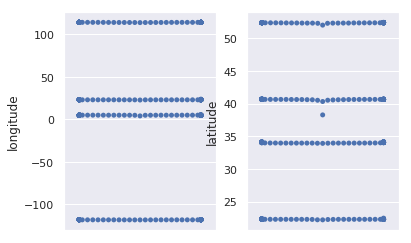

In [25]:
# Visualization with beeswarm plot for longitude and latitude features
plt.subplot(1, 2, 1)
sns.swarmplot(y = df_hotels['longitude'])
plt.subplot(1, 2, 2)
sns.swarmplot(y = df_hotels['latitude'])

The plot clearly represents the geocoordinate location of four different regions.

Now let's do the same analysis with the geocoordinates of pois which is expected to the similar as already obtained. 

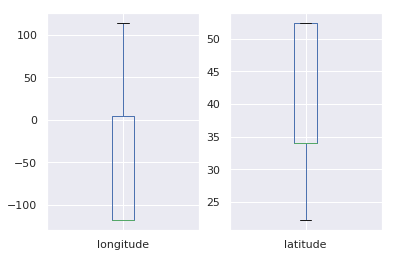

In [26]:
# Visualization with box plot for longitude and latitude features
plt.subplot(1, 2, 1)
df_pois['longitude'].plot(kind='box')
plt.subplot(1, 2, 2)
df_pois['latitude'].plot(kind='box')

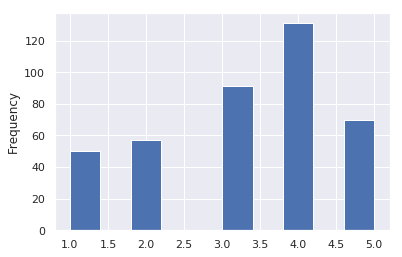

In [27]:
# Visualization with histogram plot for overall_rating feature
df_hotels['overall_rating'].plot(kind='hist')

The overall rating quality shows the rating values in the range of 1 to 5.

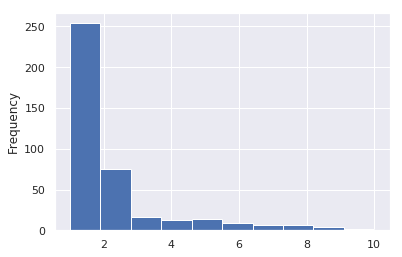

In [28]:
df_hotels['impression_level'].plot(kind='hist')

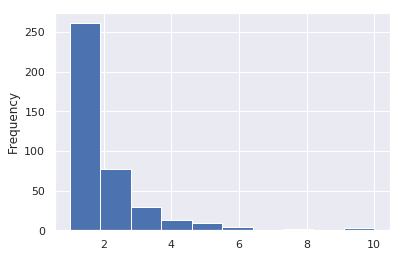

In [29]:
df_hotels['interaction_level'].plot(kind='hist')

For both impression and interaction, levels mostly below 3 are observed.

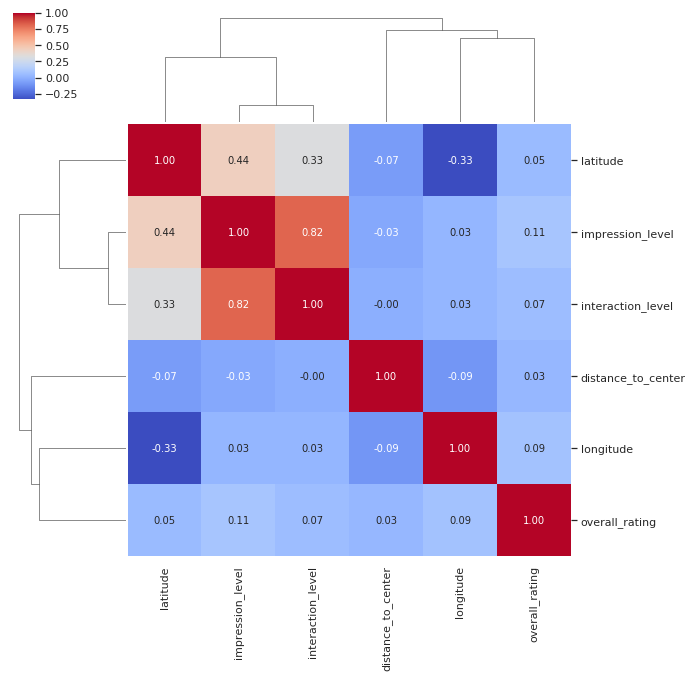

In [30]:
# Correlation matrix between non-binary features as a hierarchically-clustered heatmap
g = sns.clustermap(df_hotels.iloc[:,4:10].corr(), annot=True, fmt = ".2f", cmap = "coolwarm")

As can be seen from the table, there is a significant correlation between impression and interaction levels. 
The next correlation is between latitude with impression and interation levels, respectively.

It seems that overall quality ratings are independent of the other features selected.

# Part 2: Creating 'nightlife' scores for hotels


First of all let's see what's night life?

Nightlife is a collective term for entertainment that is available and generally more popular from the late evening into the early hours of the morning. It includes pubs, bars, nightclubs, parties, live music, concerts, cabarets, theatre, cinemas, and shows. (from wikipedia)

### 1. Influential Features

Let's start with take a look at the label of the features (column names).

In [31]:
# Extract the columns of hotels dataset
df_hotels.columns

Index(['hotel_id', 'city_id', 'hotel_type', 'basename', 'distance_to_center',
       'longitude', 'latitude', 'overall_rating', 'impression_level',
       'interaction_level', 'car_park', 'club_club_hotel', 'designer_hotel',
       'attraction_hotel', 'luxury_hotel', 'beach_front_hotel',
       'convention_hotel', 'spa_hotel', 'country_hotel', 'airport_hotel',
       'senior_hotel', 'eco_friendly_hotel', 'party_people', 'business_people',
       'honeymooners', 'singles', 'large_groups', 'family_hotel',
       'gay_friendly', 'wifi_lobby', 'wifi_room'],
      dtype='object')

In [32]:
# Extract the pois of hotels dataset
df_pois.columns

Index(['city_id', 'poi_id', 'name', 'longitude', 'latitude', 'city', 'country',
       'poi_types'],
      dtype='object')

Let's see which features in the hotels dataset have to be considered for the concept of nightlife. 

The following features in the hotels dataset are assumed to be influential.

1. hotel_type
2. distance_to_center
3. latitude
4. car_park
5. club_club_hotel
6. beach_front_hotel
7. convention_hotel
8. spa_hotel
9. country_hotel
10. party_poeple
11. singles
12. large_groups
13. gay_friendly
14. wifi_lobby

The following features in the pois dataset are assumed to be influential.

1. latitude
2. poi_types

### 2. Set a new index

It would be beneficial to set a new index for hotels datasets based on hotel IDs. 

In [33]:
df_hotels = df_hotels.set_index('hotel_id')

In [34]:
df_hotels.head()

,city_id,hotel_type,basename,distance_to_center,longitude,latitude,overall_rating,impression_level,interaction_level,car_park,...,eco_friendly_hotel,party_people,business_people,honeymooners,singles,large_groups,family_hotel,gay_friendly,wifi_lobby,wifi_room
hotel_id,,,,,,,,,,,,,,,,,,,,,
11511119,31497,Hotel,Xi Hu,2799,114.171005,22.306065,4.0,1,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11577919,14121,Hotel,Colors Urban Thessaloniki,586,22.939219,40.634808,5.0,1,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11530983,27561,Hotel,Van der Valk Hotel Oostzaan - Amsterdam,6485,4.876711,52.427399,5.0,1,2,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11814291,14121,Hotel,Elia City,611,22.938929,40.634880,4.0,1,1,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11938295,31497,Home / Apartment,Le Petit Rosedale Hong Kong,2870,114.189240,22.279209,3.0,1,1,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 3. Hotel type

Let's start with the type of hotel which should be considered when discussing the concept of nightlife.

The following code tells us how many types we have here.

In [35]:
df_hotels['hotel_type'].unique()

array(['Hotel', 'Home / Apartment', 'Hostel', 'Bed & Breakfast', 'Inn',
       'Motel', 'Resort', 'Serviced Apartment'], dtype=object)

Depending on the meaning of any accommodation you can think of them from a nightlife perspective.

- Hotel: a place that provides temporary sleeping accommodations to travelers such a large, complex building in the cities.
- Inn: a hotel or tavern that provides lodging to travelers such a hotel in a small town.
- Serviced Aparment: a fully furnished apartment available for short-term or long-term stay, providing hotel-like amenities.
- Home / Apartment: a fully furnished apartment available for short-term or long-term stay
- Motel: a roadside hotel designed primarily for motorists, typically having the rooms arranged in low blocks with parking directly outside.
- Hostel: an establishment which provides inexpensive food and lodging for a specific group of people, such as students, workers, or travellers.
- Resort: a full service lodging facility, intended primarily for vacationers and usually located in places frequented for relaxation or recreation, such as beaches, seashores, scenic or historic areas, ski parks, spas. 
- Bed & Breakfast: a small lodging establishment that offers overnight accommodation and breakfast. Bed and breakfasts are often private family homes and usually has the hosts living in the house.


If we don't think complex, we can rate them from the perspective of nightlife. For instance as follows:

1. Hostel
2. Motel
3. Resort
4. Bed & Breakfast
5. Hotel
6. Inn
7. Serviced Apartment
8. Home / Apartment

We then convert this ranking to a part of the ranking algorithm with scoring values.

### 4. Distance to center and car park

Closer to city center, easier access to nightlife. 
The distance must be divided by specified ranges. To do this, we need to see if the distance is suitable for walking, or driving is needed.

So let's rank them as follows.

1. less than 3 km: walking friendly
2. between 3 and 5 km: walking and also driving
3. between 5 and 10 km: less walking and more driving
4. between 10 to 20 km: only driving
5. between 20 to 50: only driving
6. above 50: only driving

Car_park feature should be considered because of driving. Therefore here we a mixture of two features. 

### 5. Latitude

One of the most important factors determining your climate is your latitude. The climate is important for nightlife, especially for outdoor activities.

Let's rank them according to the existing scientific division.

1. From +23.5 to +66.5 and between -23.5 and -66.5 are the temperate zones, where there are clear spring/summer/fall/winter seasons.  

2. Between -23.5 and +23.5 latitude we have the tropics - where high temperatures are the norm, and the sun can beat down from directly overhead once or twice each year.  

3. Above +66.5 we have the the North Pole, and below -66.5S we have the South Pole.


### 6. Other features in hotels dataset

The features discussed earlier are probably the most important. 

We need to know that these features are not independent of each other. However, we try to keep our model as simple as possible but not too simple to not include important points. The point is that we do not want the model to be complicated.


### 7. poi types

Let's not include the latitude of poi locations as it is expected to be close to the latitude of the hotels. This has already been confirmed by our figures. Therefore in the pois dataset the focus is on poi types.

First, we extract all the poi types.

In [36]:
df_pois['poi_types'].unique()

array(['Architectural Buildings, Historic Sites, Tourist Attractions',
       'Religious Sites, Tourist Attractions',
       'Museums, Tourist Attractions',
       'Architectural Buildings, Historic Sites, Museums, Tourist Attractions',
       'Bar / Pub, Food & Drink', 'Restaurants, Food & Drink',
       'Nature, Zoos / Aquariums', 'Stadium, Sports', 'Shopping',
       'Historic Sites, Tourist Attractions',
       'Event / Entertainment, Festival Area',
       'Event / Entertainment, Performing Arts Venue',
       'Boardwalk / Promenade / Street, Tourist Attractions',
       'Event / Entertainment, Cinema', 'Outfit Shops, Shopping',
       'Architectural Buildings, Historic Sites, Palaces / Castles, Tourist Attractions',
       'Architectural Buildings, Historic Sites, Religious Sites, Tourist Attractions',
       'Architectural Buildings, Religious Sites, Tourist Attractions',
       'Architectural Buildings, Tourist Attractions',
       'Bar / Pub, Restaurants, Food & Drink, Café',


In [37]:
# Get a list of elements per row
poi_split = df_pois['poi_types'].str.split(', ')
poi_split = pd.DataFrame(poi_split)
poi_split.head()

,poi_types
0,"[Architectural Buildings, Historic Sites, Tour..."
1,"[Religious Sites, Tourist Attractions]"
2,"[Religious Sites, Tourist Attractions]"
3,"[Museums, Tourist Attractions]"
4,"[Architectural Buildings, Historic Sites, Muse..."


This list is still a big one. A set() function will be useful for extracting unique names.

In [38]:
# Create a list with all elements in poi_types
list_sum = sum(list(poi_split['poi_types']), [])
set_sum = set(list_sum)
set_sum

{'Airports',
 'Amusement Park',
 'Architectural Buildings',
 'Art Galleries',
 'Bar / Pub',
 'Beach',
 'Boardwalk / Promenade / Street',
 'Botanical Gardens',
 'Bowling',
 'Bus Stations',
 'Café',
 'Car Rental',
 'Casino',
 'Cinema',
 'Classes / Workshops',
 'Disco / Nightclub',
 'Event / Entertainment',
 'Festival Area',
 'Flea / Street Markets',
 'Food & Drink',
 'Game Centers',
 'Gift Shop',
 'Golf Area',
 'Gym / Fitness Center',
 'Harbors',
 'Historic Sites',
 'Islands',
 'Lake',
 'Lookout',
 'Malls',
 'Metro Stations',
 'Mountain',
 'Museums',
 'National Parks',
 'Nature',
 'Outfit Shops',
 'Palaces / Castles',
 'Parks',
 'Performing Arts Venue',
 'Religious Sites',
 'Restaurants',
 'River',
 'Services',
 'Shopping',
 'Spas',
 'Sports',
 'Stadium',
 'Taxi Stand',
 'Tour Provider',
 'Tourist / Visitor Centers',
 'Tourist Attractions',
 'Trade Fair',
 'Trails / Tracks',
 'Train Stations',
 'Tram Stations',
 'Transportation',
 'Water Parks',
 'Windsurfing Spot',
 'Zoos / Aquariums'}

As it can be seen it is a long list of pois. Let's choose the activities best suited for nightlife. 

In [39]:
activities = ['Bar / Pub', 'Food & Drink', 'Restaurants', 'Café', 'Disco / Nightclub', 
                 'Event / Entertainment', 'Cinema', 'Performing Arts Venue', 'Festival Area', 
                 'Beach Spas',  'Boardwalk / Promenade / Street',  ' National Parks', 
                 'Tourist / Visitor Centers', 'Spas', 'Nature', 'Beach', 'Bowling', 'Game Centers', 
             'Malls', 'Shopping', 'Tourist Attractions', 'Water Parks' ]

facilities = ['Car Rental', 'Bus Stations', 'Transportation', 'Tram Stations', 'Train Stations', 'Taxi Stand', 
             'Metro Stations', 'Tour Provider']

In [40]:
poi_split = pd.DataFrame(poi_split)
poi_split.head()

,poi_types
0,"[Architectural Buildings, Historic Sites, Tour..."
1,"[Religious Sites, Tourist Attractions]"
2,"[Religious Sites, Tourist Attractions]"
3,"[Museums, Tourist Attractions]"
4,"[Architectural Buildings, Historic Sites, Muse..."


In [41]:
df_new_pois = pd.concat([df_pois['city_id'], poi_split['poi_types']], axis=1)
df_new_pois.head()

,city_id,poi_types
0,14121,"[Architectural Buildings, Historic Sites, Tour..."
1,14121,"[Religious Sites, Tourist Attractions]"
2,14121,"[Religious Sites, Tourist Attractions]"
3,14121,"[Museums, Tourist Attractions]"
4,14121,"[Architectural Buildings, Historic Sites, Muse..."


In [42]:
groupby_cityid = df_new_pois.groupby(['city_id'])['poi_types'].sum()
groupby_cityid = pd.DataFrame(groupby_cityid)
groupby_cityid

,poi_types
city_id,
14121,"[Architectural Buildings, Historic Sites, Tour..."
14257,"[Boardwalk / Promenade / Street, Historic Site..."
27561,"[Event / Entertainment, Art Galleries, Tourist..."
31497,"[Lookout, Tourist Attractions, Malls, Shopping..."


### 8. Scoring algorithm

Text(0, 0.5, 'Score')

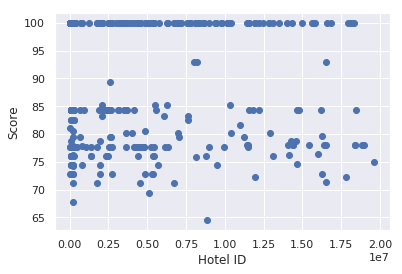

In [43]:
# Initiate a list for the scores
score = []

# Initiate a list for the poi scores
poi_score = []

# For loop over hotel IDs
for i in df_hotels.index:
    s = 0
    
    # Include the effect of latitude (climate)
    if (abs(df_hotels.loc[i, 'latitude']) >= 23.5) & ((abs(df_hotels.loc[i, 'latitude']) <= 66.5)):
        latitude = 3
    elif (abs(df_hotels.loc[i, 'latitude']) < 23.5):
        latitude = 2
    else: 
        latitude = 1
        
        
    # Include the effect of distance to center and car_park
    if df_hotels.loc[i, 'distance_to_center'] <= 3000:
        distance = 1.3
    elif (df_hotels.loc[i, 'distance_to_center'] > 3000) & (df_hotels.loc[i, 'distance_to_center'] <= 5000):
        if df_hotels.loc[i, 'car_park'] == 1:
            distance = 1.25
        else:
            distance = 1.2
    elif (df_hotels.loc[i, 'distance_to_center'] > 5000) & (df_hotels.loc[i, 'distance_to_center'] <= 10000): 
        if df_hotels.loc[i, 'car_park'] == 1:
            distance = 1.2
        else: 
            distance = 1.15
    elif (df_hotels.loc[i, 'distance_to_center'] > 10000) & (df_hotels.loc[i, 'distance_to_center'] <= 20000):
        if df_hotels.loc[i, 'car_park'] == 1:
            distance = 1.15
        else:
            distance = 1.1
    elif (df_hotels.loc[i, 'distance_to_center'] > 20000) & (df_hotels.loc[i, 'distance_to_center'] <= 50000): 
        if df_hotels.loc[i, 'car_park'] == 1: 
            distance = 1.1
        else: 
            distance = 1.05
    else: 
        if df_hotels.loc[i, 'car_park'] == 1: 
            distance = 1.05
        else: 
            distance = 1
            
    
    # Include the effect of activities and facilities
    poi = 0
    cityID = df_hotels.loc[i, 'city_id']
    # Foor loop over poi types per city
    for j in groupby_cityid.loc[cityID, 'poi_types']:
        if j in activities:
            poi = poi + 0.01
        if j in facilities:
            poi = poi + 0.005
    poi_score.append(poi)
    
    
    # Include the effect of hotel type
    if df_hotels.loc[i, 'hotel_type'] == 'Hostel':
        hotel_type = 1.35
    elif df_hotels.loc[i, 'hotel_type'] == 'Motel':
        hotel_type = 1.3
    elif df_hotels.loc[i, 'hotel_type'] == 'Resort':
        hotel_type = 1.25
    elif df_hotels.loc[i, 'hotel_type'] == 'Bed & Breakfast':
        hotel_type = 1.2
    elif df_hotels.loc[i, 'hotel_type'] == 'Hotel':
        hotel_type = 1.15
    elif df_hotels.loc[i, 'hotel_type'] == 'Inn':
        hotel_type = 1.1
    elif df_hotels.loc[i, 'hotel_type'] == 'Serviced Apartment':
        hotel_type = 1.05
    else:
        hotel_type = 1
        
    # Include the effect of other features in hotels dataset
    
    # Add the score of dependent features
    s = s + latitude * distance * poi * hotel_type

    
    s = s + 5* (df_hotels.loc[i, 'club_club_hotel'] + df_hotels.loc[i, 'beach_front_hotel'] + 
                 df_hotels.loc[i, 'convention_hotel'] + df_hotels.loc[i, 'spa_hotel'] + 
                 df_hotels.loc[i, 'country_hotel'] + df_hotels.loc[i, 'party_people'] + 
                 df_hotels.loc[i, 'club_club_hotel'] + df_hotels.loc[i, 'singles'] + 
                 df_hotels.loc[i, 'large_groups'] + df_hotels.loc[i, 'gay_friendly'] + 
                 df_hotels.loc[i, 'wifi_lobby'])
    # Keep the limit to be not greater than 100
    if s > 100:
        s = 100
        
        
    score.append(s)
    
# Plot of lifnight score per hotel
plt.scatter(x = df_hotels.index, y = score)
plt.xlabel('Hotel ID')
plt.ylabel('Score')

In [44]:
# Craet a dataframe including hotel_id, city_id and score
df_score = pd.DataFrame(df_hotels['city_id'], df_hotels.index)
df_score['score'] = score
df_score.head()

,city_id,score
hotel_id,,
11511119,31497,77.74205
11577919,14121,84.37985
11530983,27561,100.00000
11814291,14121,84.37985
11938295,31497,72.16700


In [45]:
df_score.tail()

,city_id,score
hotel_id,,
18397931,14121,77.939000
8038679,14121,92.967650
8354403,14257,100.000000
18828775,14121,77.939000
13119007,31497,76.098125


In [46]:
# Save the score dataframe as a CSV file
df_score.to_csv('/home/behrouz/Documents/trivago/score.csv')